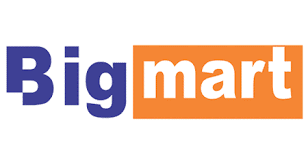

# BIG-MART SALES PREDICTION AND ANALYSIS
By SHRUTHI S

In [1]:
!pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib pandas-profiling xgboost
!pip install ipywidgets

## IMPORTING FILES

In [6]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# PRE-PROCESSING AND DATA ANALYSIS

In [7]:
#reading csv files as a Dataframe using read.csv function
df_train=pd.read_csv('C:/Users/SHRUTHI/Desktop/Project/MINI PROJECT 1/Train.csv')
df_test=pd.read_csv('C:/Users/SHRUTHI/Desktop/Project/MINI PROJECT 1/Test.csv')

In [10]:
#importing first five rows of the dataframe
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [12]:
#importing last five rows of the dataframe
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [11]:
df_train.shape #tells number of rows and columns

(8523, 12)

In [7]:
df_train.isnull().sum() #number of null values in train dataset

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_test.isnull().sum() #number of null values in test dataset

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
df_train.info() #seeing the detailed info of the dataset and its types of target variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df_train.describe()  # to generate descriptive statistics that summarize the central tendency, dispersion and
                     # shape of a dataset's distribution, excluding NaN values.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#we have null values in item weight and outet size. The null values of item weight is replaced by mean imputatiion.

In [12]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
#filling null values by mean imputation
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [17]:
#filling up null values of outlet size which is a categorical column with mode imputation
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [18]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df_train['Outlet_Size'].mode()
df_test['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [20]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

### Identifying null values

In [21]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df_test.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [23]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [24]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


# EDA ( Data Exploration )

Splitting the data into numerical and categorical and placing them in seperate lists namely "num" and "cat"¶

In [25]:
#list of all the numeric columns
num = df_train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df_train.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  df_train[num]
#categoric df
BM_cat = df_train[cat]

[df_train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

### Replacing all the duplicates of Fat content column into two categories ("Low Fat and "Regular")

In [26]:
df_train =  df_train.replace(to_replace ="low fat",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="LF",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="reg",  value ="Regular")

In [16]:
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df_test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [19]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# DATA VISUALISATION

### UNIVARIATE ANALYSIS

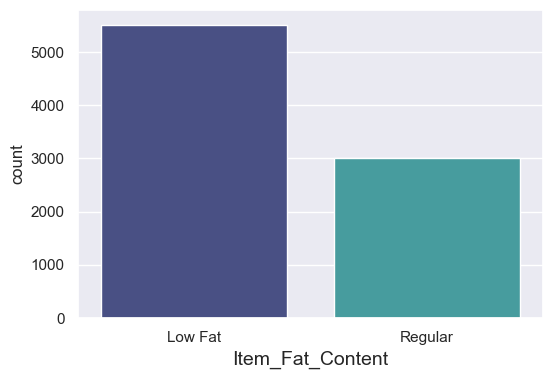

In [27]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=df_train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

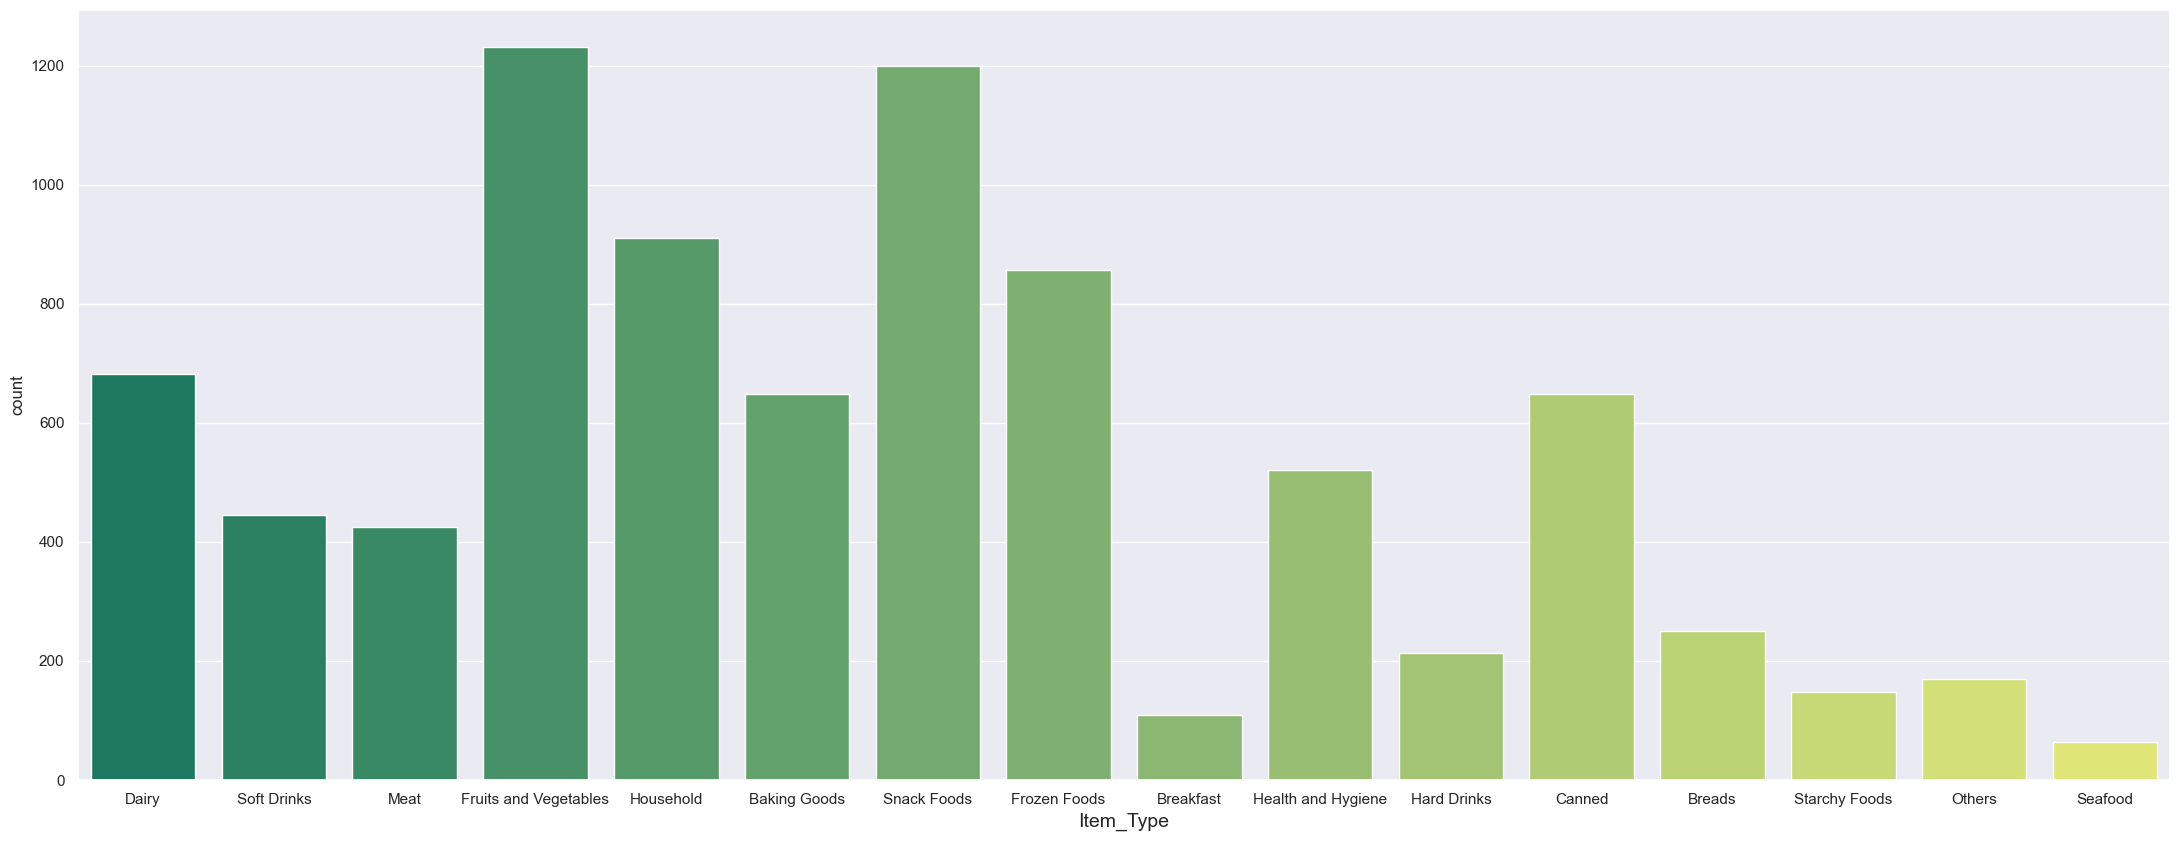

In [28]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=df_train ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

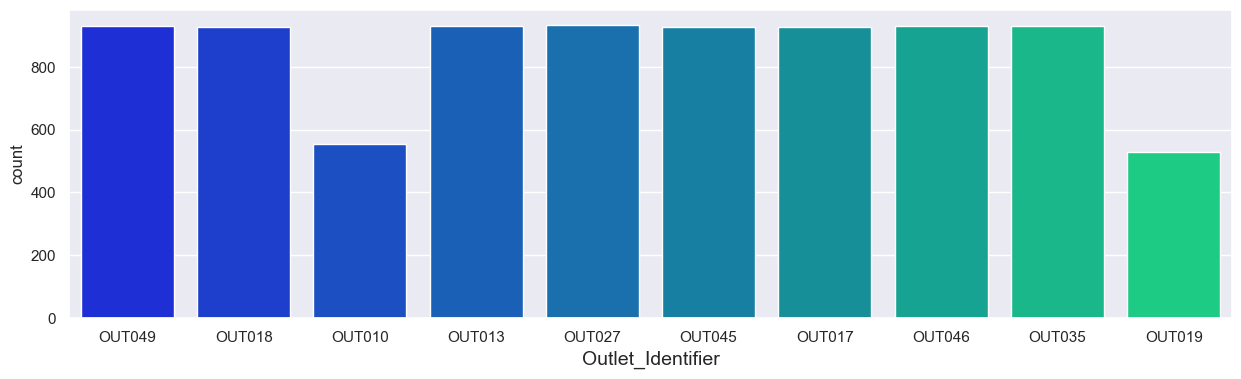

In [29]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=df_train ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

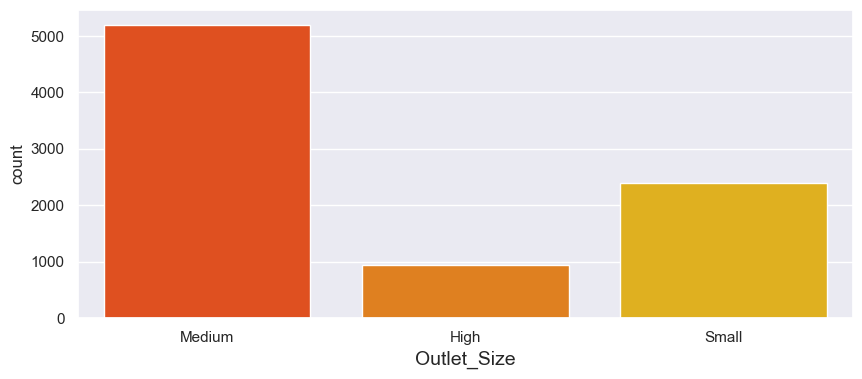

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=df_train ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

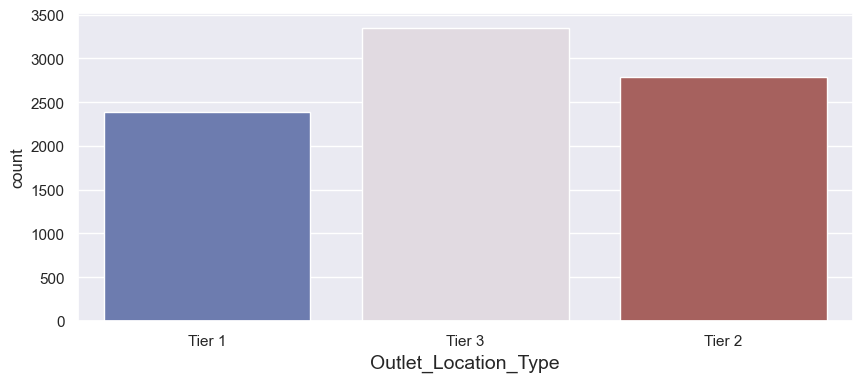

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=df_train ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

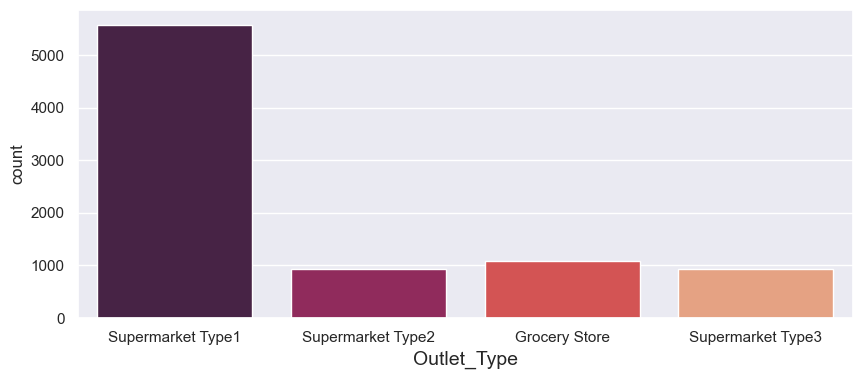

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=df_train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

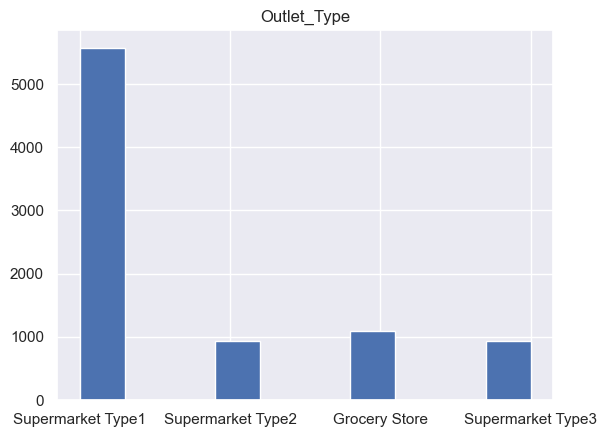

In [33]:
#for numerical items
#list of all the numeric columns
#num = df_train.select_dtypes('number').columns.to_list()
#numeric df
BM_num = df_train[num]

plt.hist(df_train['Outlet_Type'])
plt.title('Outlet_Type')
plt.show()

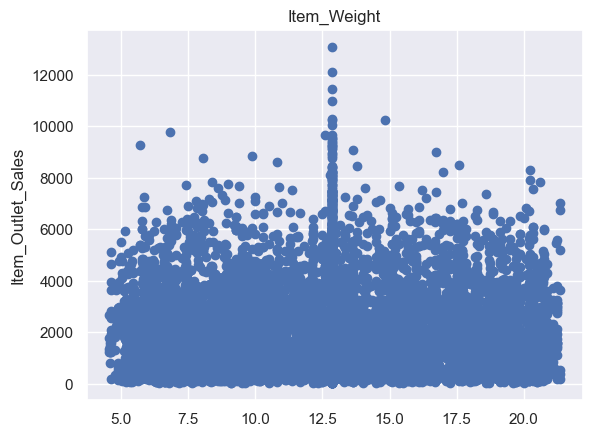

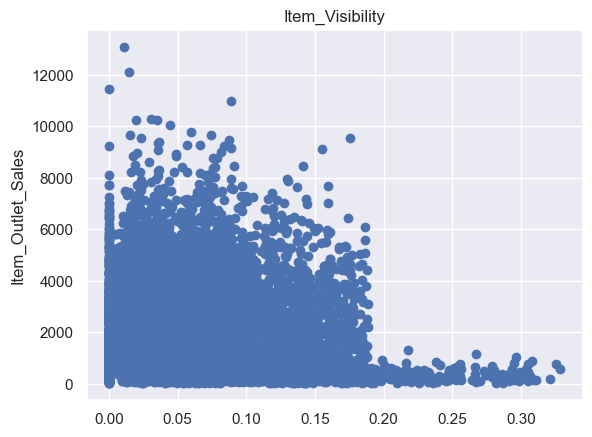

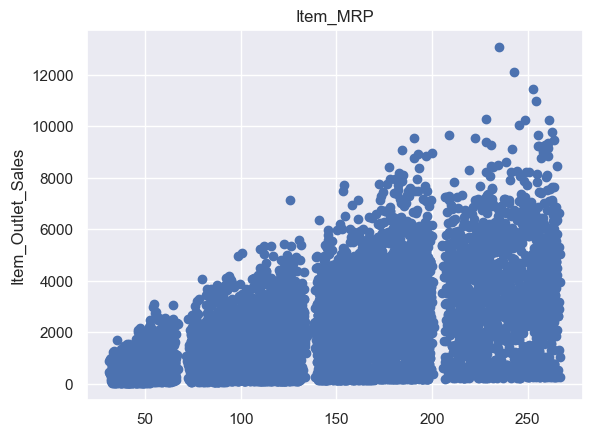

In [34]:
#for item outlet sales
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

### Correlation matrix

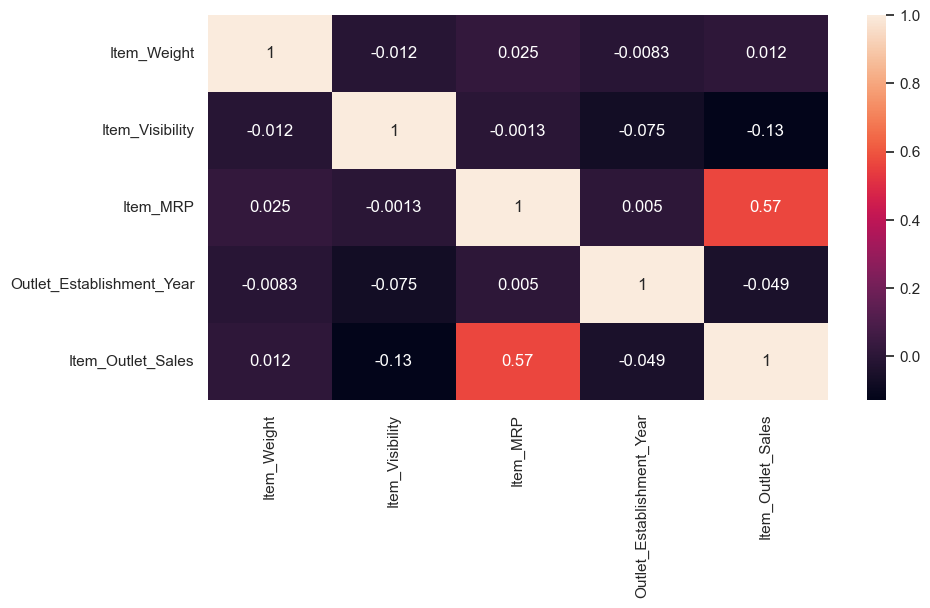

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

GridSpec(6, 7)

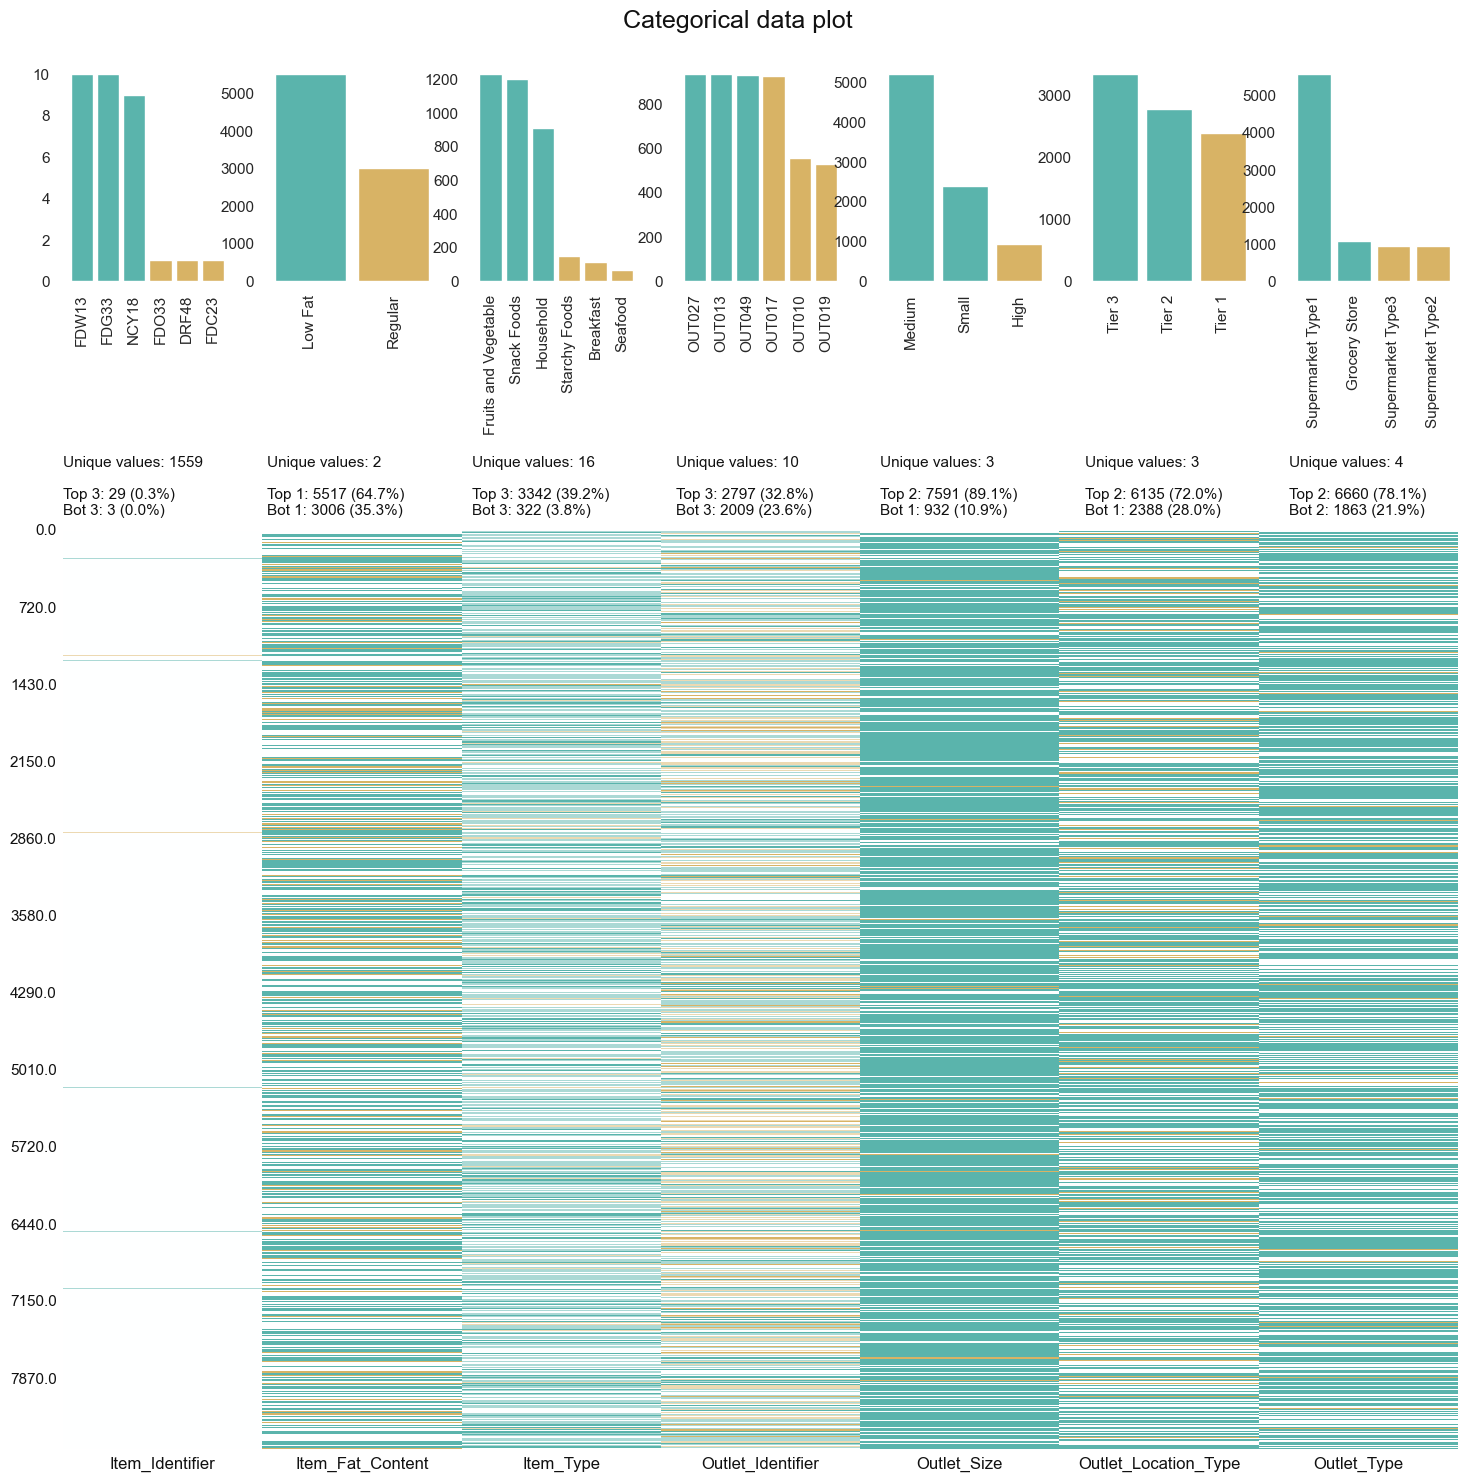

In [36]:
import klib
klib.cat_plot(df_train)

In [37]:
klib.corr_mat(df_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

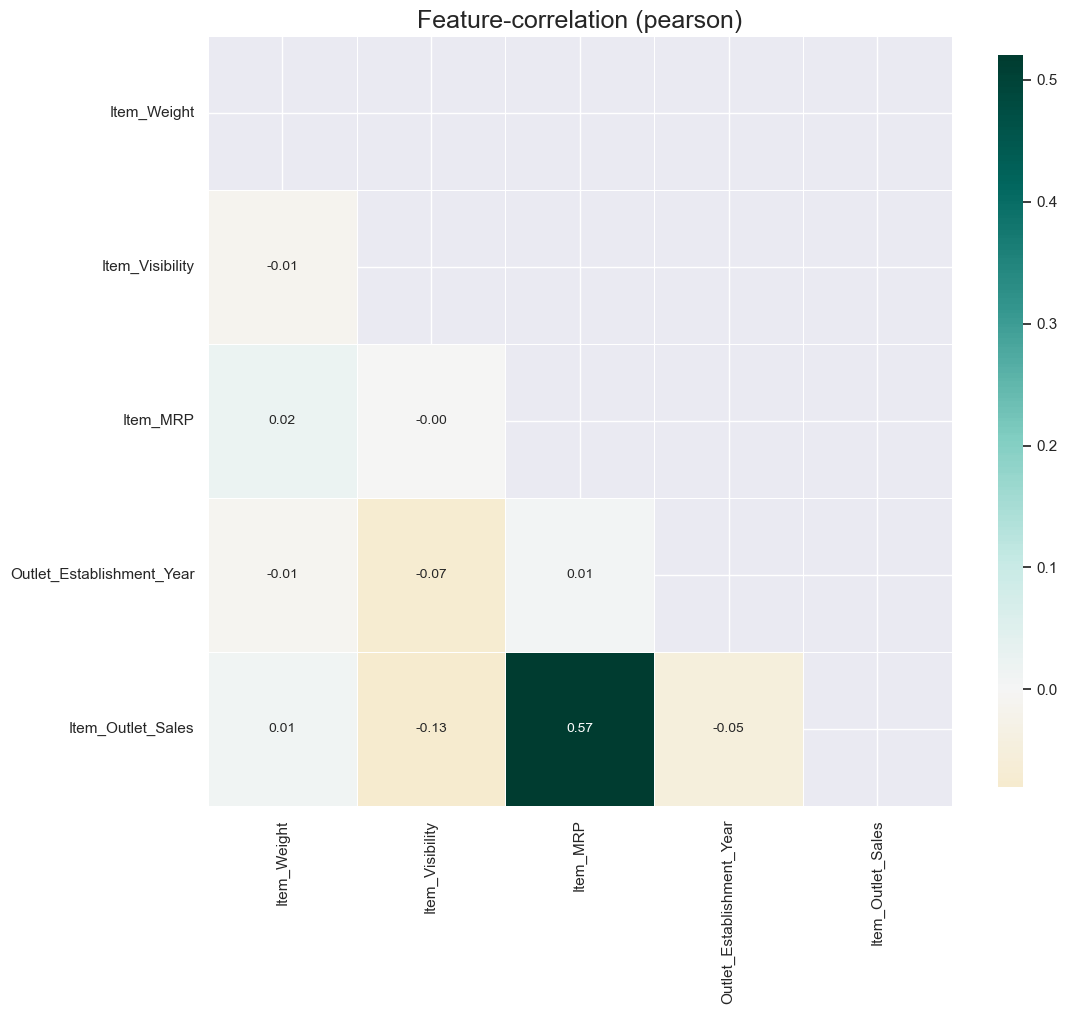

In [38]:
klib.corr_plot(df_train)

# Profile report

In [39]:
from pandas_profiling import ProfileReport

In [40]:
profile = ProfileReport(df_train, title='Pandas Profiling Report')

In [41]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='Item_Weight', ylabel='Density'>

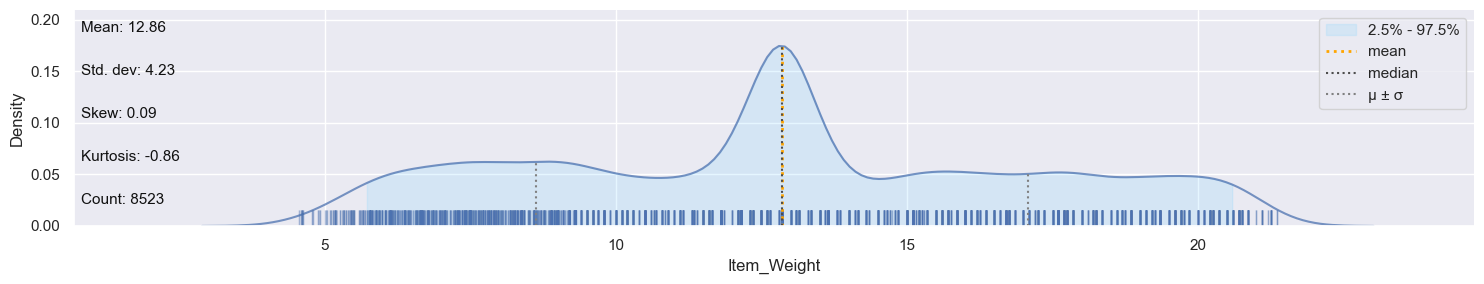

In [42]:
klib.dist_plot(df_train)

In [43]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# FEATURE ENGINEERING

### Treating the nominal and ordinal values 

In [46]:
cat = df_train.select_dtypes('object').columns.to_list()
BM_cat = df_train[cat]

In [47]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

## LABEL ENCODING

#### Item_Fat_Content ,Outlet_Size, Outlet_Location_Type will be label encoded as they contain less than 3 categorical values

In [48]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

Label = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

for i in Label:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.200000,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.930000,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052
5,FDP36,10.395000,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,Supermarket Type2,556.6088
6,FDO10,13.650000,1,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,Supermarket Type1,343.5528
7,FDP10,12.857645,0,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,Supermarket Type3,4022.7636
8,FDH17,16.200000,1,0.016687,Frozen Foods,96.9726,OUT045,2002,1,1,Supermarket Type1,1076.5986
9,FDU28,19.200000,1,0.094450,Frozen Foods,187.8214,OUT017,2007,1,1,Supermarket Type1,4710.5350


## ONE HOT ENCODING

#### Item type and outlet type will be one hot encoded as they contain more number of categorical values

In [49]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df_train[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(df_test[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
tr_oh.index = df_train.index
te_oh.index = df_test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pd.concat([df_train, tr_oh], axis=1)
te_fe = pd.concat([df_test, te_oh], axis=1)
tr_fe.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.200000,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.930000,0,0.000000,Household,53.8614,OUT013,1987,0,2,...,0,0,0,0,0,0,0,1,0,0
5,FDP36,10.395000,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,...,0,0,0,0,0,0,0,0,1,0
6,FDO10,13.650000,1,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,...,0,0,0,1,0,0,0,1,0,0
7,FDP10,12.857645,0,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,...,0,0,0,1,0,0,0,0,0,1
8,FDH17,16.200000,1,0.016687,Frozen Foods,96.9726,OUT045,2002,1,1,...,0,0,0,0,0,0,0,1,0,0
9,FDU28,19.200000,1,0.094450,Frozen Foods,187.8214,OUT017,2007,1,1,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# Dropping irrelevant columns

tr_fe = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

# MODELING
## Three models are used below- LINEAR REGRESSION, RANDOM FOREST REGRESSOR, XG BOOST REGRESSOR

## LINEAR REGRESSION

In [51]:
#TRAIN AND TEST SPLIT
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [52]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [53]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3982,10.800000,0,0.082550,193.7504,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8364,9.000000,0,0.086088,168.7816,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5043,12.857645,0,0.000000,89.4146,1,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5104,10.195000,1,0.017659,240.1538,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8248,9.800000,1,0.045359,36.1874,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,15.200000,0,0.020280,49.1034,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7891,12.857645,1,0.025616,188.1872,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4859,13.500000,1,0.000000,78.3960,2,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3264,18.700000,0,0.104890,121.4072,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
y_train

3982    4602.0096
8364    3355.6320
5043    2645.2234
5104    1442.1228
8248     423.4488
          ...    
4373     194.4136
7891    6239.8776
4859    1438.1280
3264    3185.1872
2732    4544.0850
Name: Item_Outlet_Sales, Length: 1704, dtype: float64

In [57]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4931,14.500000,0,0.089960,159.5604,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4148,12.857645,0,0.009535,64.5510,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7423,11.500000,0,0.017742,129.6626,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4836,10.195000,0,0.000000,143.1154,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
944,21.000000,0,0.049264,195.0478,0,2,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517,9.500000,1,0.132522,228.6668,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7820,20.350000,1,0.151045,79.2276,2,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3406,6.550000,0,0.024665,103.3332,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6538,20.850000,0,0.021417,104.6306,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
y_test

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
          ...    
5517    4146.6024
7820     649.8208
3406    2050.6640
6538    1149.8366
8227     341.5554
Name: Item_Outlet_Sales, Length: 6819, dtype: float64

In [60]:
#model
LR = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 837.74

 Mean Squared Error: 1285473.05

 R^2 Score: 0.5594

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.5582


In [61]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

# RANDOM FOREST REGRESSOR

In [62]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1032.24

 Mean Squared Error: 1971177.35

 R^2 Score: 0.3244

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.56
0.52
0.51
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5414


In [63]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")

In [64]:
Random_Forest_Regressor

,y_test,prediction
4931,1426.1436,2198.214386
4148,1201.7690,994.394564
7423,1836.2764,2099.087561
4836,2410.8618,2167.988624
944,1549.9824,3020.263802
...,...,...
5517,4146.6024,3913.318355
7820,649.8208,1027.179634
3406,2050.6640,1652.941862
6538,1149.8366,1619.988886


# XG BOOST REGRESSOR

In [65]:
xg= XGBRegressor()
xg.fit(X_train, y_train)
# Predict with XGBoost
y_predict_xg = xg.predict(X_test)

# Score variables for XGBoost
XG_MAE = round(MAE(y_test, y_predict_xg), 2)
XG_MSE = round(MSE(y_test, y_predict_xg), 2)
XG_R_2 = round(R2(y_test, y_predict_xg), 4)
XG_CS = round(CVS(xg, X, y, cv=5).mean(), 4)

print(f" Mean Absolute Error (XGBoost): {XG_MAE}\n")
print(f" Mean Squared Error (XGBoost): {XG_MSE}\n")
print(f" R^2 Score (XGBoost): {XG_R_2}\n")
cross_val(xg, XGBRegressor(), X, y, 5)

XGBoost_Regressor = pd.DataFrame({'y_test': y_test, 'prediction': y_predict_xg})
XGBoost_Regressor.to_csv("XGBoost Regressor.csv")

 Mean Absolute Error (XGBoost): 869.09

 Mean Squared Error (XGBoost): 1530326.07

 R^2 Score (XGBoost): 0.4755

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.56
0.5
0.49
0.54
0.55
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample

# CONCLUSION

In [66]:
MAE= [LR_MAE,RFR_MAE,XG_MAE]
MSE= [LR_MSE,RFR_MSE,XG_MSE]
R_2= [LR_R_2,RFR_R_2,XG_R_2]
Cross_score= [LR_CS,RFR_CS,XG_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","XGBoost"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
0,Linear Regression,837.74,1285473.05,0.5594,0.5582
2,XGBoost,869.09,1530326.07,0.4755,0.5271
1,Random Forest Regressor,1032.24,1971177.35,0.3244,0.5918


# SUMMARY
## Model Insights
### Linear Regression is straightforward and computationally less intensive compared to tree-based methods like Random Forest and XGBoost but still it provides clear insights into feature importance and the direction of their impact on the target variable through coefficient values.

### Random forest regressor works well for complex interaction between variables and non linear relationships.

### XGBoost is often the top-performing choice for regression tasks, especially when dealing with large and complex datasets. It is highly effective at capturing non-linear patterns and interactions in the data

